
# House Price Prediction using Machine Learning: 

Developing and Evaluating Models for King County, USA

A real estate company wants to predict the prices of houses in King County, USA, to assist their clients in making informed buying and selling decisions. The company has a dataset that contains information on various features of the houses, such as the number of bedrooms, bathrooms, floors, etc. as well as their corresponding prices. The business objective of the task above is to develop a machine learning model that can accurately predict house prices in King County, USA. This model can be used by real estate companies, property appraisers, and individuals to estimate the market value of a house based on its features such as the number of bedrooms, bathrooms, floors, etc. Having an accurate model can help with decision making for buying, selling, or valuing properties, which can have significant financial implications.

### Why is machine learning ideal for the task?

Machine learning is ideal for the task of house price prediction because it can analyze a large dataset with multiple variables to identify patterns and relationships that can be used to make accurate predictions. In this specific task, there are 18 features that can potentially influence the house prices, and manually determining the impact of each feature can be time-consuming and challenging. Machine learning models can be trained to automatically learn and understand these relationships, and provide accurate predictions for new data. Additionally, machine learning models can be improved over time with additional data, and can adapt to changing market conditions and trends, making them a useful tool for real estate professionals and homeowners.

### Is the probelm supervised, unsupervised or reinforcement learning?
 The problem is supervised learning. This is because the target variable, "house price," is included in the dataset, and the goal is to predict house prices using various features in the dataset. Supervised learning involves predicting a target variable based on input features and a labeled dataset, which is exactly what is being done in this case.

 It is a regression problem since the target variable, i.e., the house price, is a continuous variable. The goal is to predict the price of a house based on the given features, which makes it a regression problem.


For the specific problem of predicting house prices using the King County dataset, I am going to use batch learning since the the dataset is not too large and can fit into memory. In batch learning, the system is trained on the entire dataset at once, and the model is updated based on the complete set of training data. Batch learning is generally more suitable when the dataset is relatively small and the computational resources are sufficient to process the entire dataset in memory. In online learning, the model is trained incrementally on small subsets of the dataset, or even on individual samples. 




In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px

from sklearn import set_config

# to scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# to split the data
from sklearn.model_selection import train_test_split

# linear regression
from sklearn.linear_model import LinearRegression

#  polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor


# to avoid warnings 
import warnings
warnings.filterwarnings('ignore')



set_config(display="diagram")

## Loading the the data

In [66]:
# READ IN THE DATA
house_price_df = pd.read_csv('input/houseprice_data 2.csv')

#copy the data  
house_price_df_copy = house_price_df.copy()

# DISPLAY THE DATA
house_price_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

# Dataset and Features

The dataset used in this project is called "houseprice_data.csv" and is used for house price prediction in King County, USA. It contains 18 features, including:
<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>price</td>
      <td>Price of the house</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms in the house</td>
    </tr>
    <tr>
      <td>bathrooms</td>
      <td>Number of bathrooms in the house</td>
    </tr>
    <tr>
      <td>sqft_living</td>
      <td>Square footage of the living area</td>
    </tr>
    <tr>
      <td>sqft_lot</td>
      <td>Square footage of the lot</td>
    </tr>
    <tr>
      <td>floors</td>
      <td>Number of floors in the house</td>
    </tr>
    <tr>
      <td>waterfront</td>
      <td>Whether the house is located on a waterfront (1 if yes, 0 if no)</td>
    </tr>
    <tr>
      <td>view</td>
      <td>Number of times the house has been viewed</td>
    </tr>
    <tr>
      <td>condition</td>
      <td>Overall condition of the house (1-5)</td>
    </tr>
    <tr>
      <td>grade</td>
      <td>Overall grade given to the housing unit (1-13)</td>
    </tr>
    <tr>
      <td>sqft_above</td>
      <td>Square footage of house apart from basement</td>
    </tr>
    <tr>
      <td>sqft_basement</td>
      <td>Square footage of the basement</td>
    </tr>
    <tr>
      <td>yr_built</td>
      <td>Year the house was built</td>
    </tr>
    <tr>
      <td>yr_renovated</td>
      <td>Year when the house was renovated (0 if never)</td>
    </tr>
    <tr>
      <td>zipcode</td>
      <td>Zipcode of the house</td>
    </tr>
    <tr>
      <td>lat</td>
      <td>Latitude of the location of the house</td>
    </tr>
    <tr>
      <td>long</td>
      <td>Longitude of the location of the house</td>
    </tr>
    <tr>
      <td>sqft_living15</td>
      <td>Average square footage of the interior living space for the 15 nearest neighbors</td>
    </tr>
    <tr>
      <td>sqft_lot15</td>
      <td>Average square footage of the lot for the 15 nearest neighbors</td>
    </tr>
  </tbody>
</table>


In [6]:
# CHECK THE DATA TYPES AND MISSING VALUES
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

The dataset used in this project is complete and does not contain any missing values.

In [174]:
# CHECK THE STATISTICAL SUMMARY OF THE DATA
house_price_df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.401822e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.673622e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

The summary statistics for the dataset are presented in table above. 
<ul>
<li>Overall, the data appears to be within reasonable bounds and there are no obvious outliers. The average price of a house in the dataset is `$75,000`,  with a standard deviation of $367,362.2, indicating that there is a significant amount of variability in house prices. The minimum and maximum prices are $75,000 and $7,700,000, respectively.
</li>

<li>
The majority of houses in the dataset have 3 bedrooms and 2.25 bathrooms. The average size of a house in the dataset is 2,080 square feet, with a standard deviation of 918 square feet. The minimum and maximum sizes are 290 square feet and 13,540 square feet, respectively.
</li>

<li>
The distribution of floors in the dataset is skewed towards single-story houses, with the majority of houses having only one floor. The majority of houses are not located on a waterfront, and the majority have not been viewed by potential buyers. The average condition of the houses in the dataset is 3.41, on a scale from 1 to 5, with a standard deviation of 0.65.
</li>

<li>
The average grade of a house in the dataset is 7.65, on a scale from 1 to 13, with a standard deviation of 1.17. The distribution of grades is skewed towards lower values, indicating that the majority of houses in the dataset are of average or below-average quality.
</li>

<li>
The average year built of the houses in the dataset is 1971, with a standard deviation of 29 years. The oldest house in the dataset was built in 1900, and the most recent was built in 2015. The average year of renovation is 84 years after the house was built, with a standard deviation of 402 years.
</li>

<li>
The majority of houses in the dataset are located in the zip codes 98004, 98103, 98005, 98033, and 98040. The average latitude of the houses in the dataset is 47.56, with a standard deviation of 0.14, and the average longitude is -122.21, with a standard deviation of 0.14.
</li>

<li>
The average size of the nearest 15 neighbors for a given house in the dataset is 1,986 square feet, with a standard deviation of 687 square feet. The average size of the lot for the nearest 15 neighbors is 12,028 square feet, with a standard deviation of 26,317 square feet.
</li>

</ul>




# Visualizing the dataset using a map

Visualizing the dataset using a map with latitude and longitude helps to see the spatial distribution of the houses in the dataset. This visualization provides a quick overview of the data and can reveal any patterns or trends that may be useful in the analysis. For example, the map may show that house prices are higher in certain areas, which could indicate that location is an important factor in predicting house prices. Additionally, a map visualization can help identify any outliers or data errors in the dataset, such as houses that have incorrect or missing location data.

<AxesSubplot: xlabel='long', ylabel='lat'>

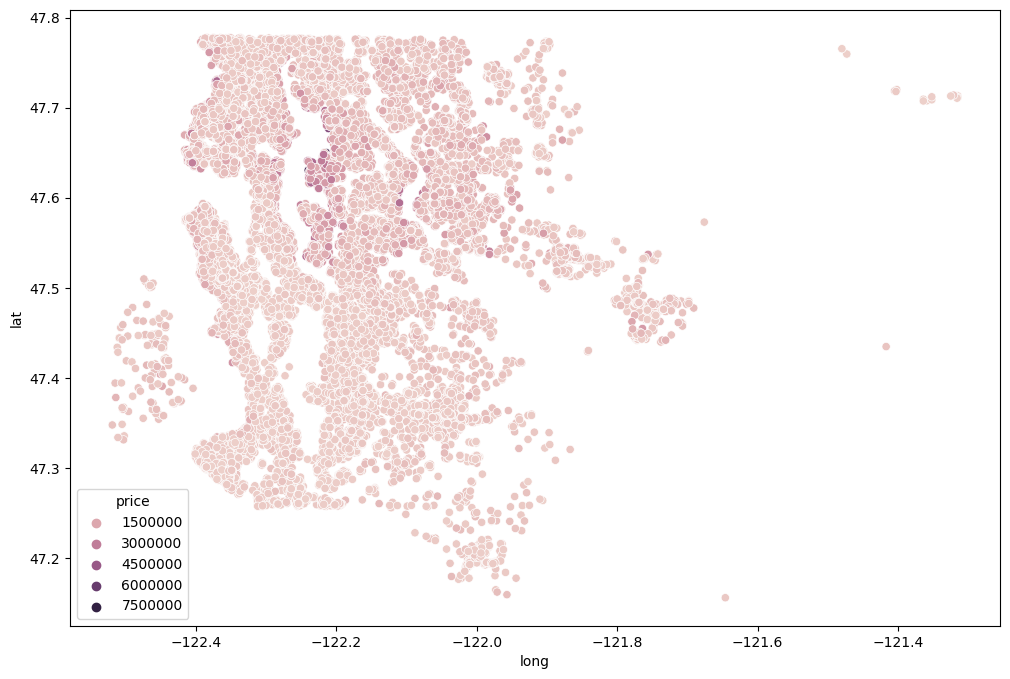

In [14]:
# VISUALIZE THE LOCATION OF THE HOUSES USING LATITUDE AND LONGITUDE
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=house_price_df,hue='price')

In [15]:
# VISUALIZE THE PRICE OF THE HOUSES USING HEATMAP   
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='price', radius=10,
                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,
                        mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()


<ul>
  <li>The map visualization shows the location of houses in the Seattle area.</li>
  <li>By using the hue parameter, we can see that the house prices tend to increase as we move towards the center of the city.</li>
  <li>On the other hand, the houses located in the outskirts of the city tend to be cheaper.</li>
</ul>


In [17]:
# VISUALIZE THE NUMBER OF BEDROOMS IN THE HOUSES USING HEATMAP
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='bedrooms', radius=10,

                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,    

                        mapbox_style="stamen-terrain")
fig.show()

<ul>
  <li>We can see that most of the houses have 3 bedrooms.</li>
  <li>Followed by 4 bedrooms.</li>
  <li>The houses with a lot of bedrooms are few.</li>
</ul>


In [19]:
# VISUALIZE THE NUMBER OF BATHROOMS IN THE HOUSES USING HEATMAP
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='bathrooms', radius=10,
                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,    
                        mapbox_style="stamen-terrain")
fig.show()

Upon analyzing the bathroom feature of the dataset, we observe that the size of 2.50 has the highest occurrence with 5380, followed by 1.0 with 3852, and 1.25 has the least. This indicates that most houses have at least one bathroom with a size of either 1.0 or 2.50, while houses with a bathroom size of 1.25 are relatively uncommon.

In [23]:
# VISUALIZE THE NUMBER OF FLOORS IN THE HOUSES USING HEATMAP
fig = px.density_mapbox(house_price_df_copy, lat='lat', lon='long', z='floors', radius=10,


                        center=dict(lat=house_price_df_copy['lat'].mean(), lon=house_price_df_copy['long'].mean()), zoom=10,    

                        mapbox_style="stamen-terrain")
fig.show()

<li>The majority of the houses in the dataset have a single floor.</li>

Obsevations of each feature from the Map visualization
<ul>
  <li>We can see that most of the houses do not have a view.</li>
  <li>We can see that most of the houses have a grade of 7.</li>
  <li>We can see that most of the houses have a condition of 3.</li>
  <li>We can see that most of the houses do not have a waterfront.</li>
  <li>We can see that most of the houses have 2 bathrooms.</li>
  <li>We can see that most of the houses have 1 floor.</li>
  <li>We can see that most of the houses have a sqft living of 2000.</li>
</ul>

# Exploratory Data Analysis (EDA) 

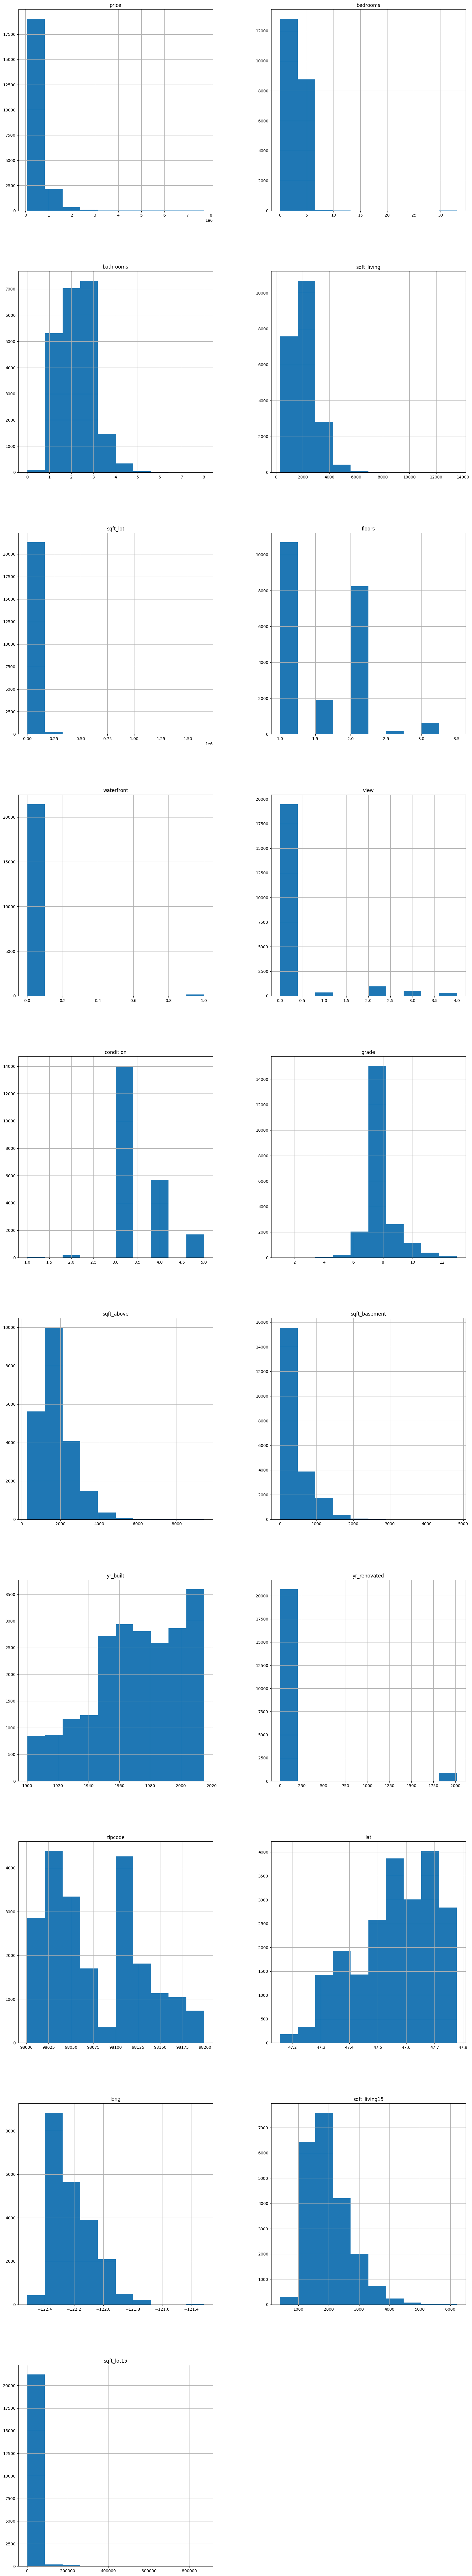

In [25]:
feature_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
house_price_df[feature_columns].hist(figsize=(20, 115), layout=(10, 2), bins=10)
plt.show()

<AxesSubplot: xlabel='bedrooms', ylabel='count'>

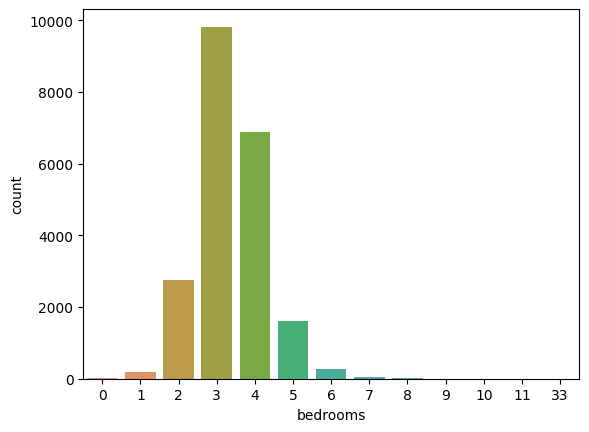

In [26]:
# VISUALIZE THE NUMBER OF HOUSES IN EACH BEDROOM CATEGORY
sns.countplot(x='bedrooms',data=house_price_df)

<AxesSubplot: xlabel='price', ylabel='Density'>

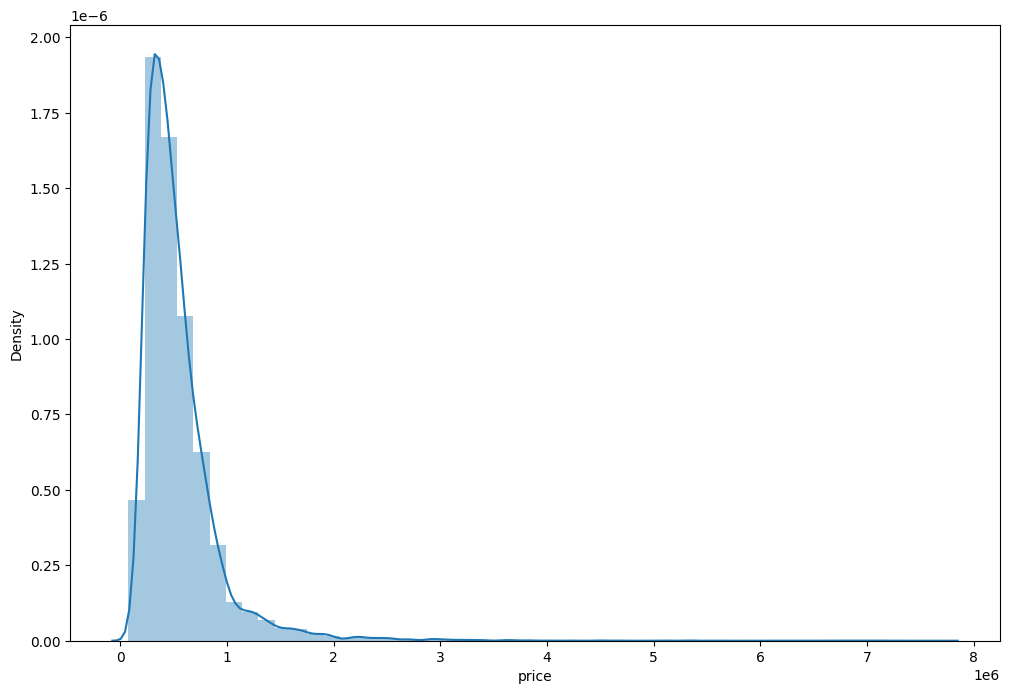

In [219]:
# VISUALIZE THE PRICE OF THE HOUSES
plt.figure(figsize=(12,8))
sns.distplot(house_price_df['price'],bins=50)


We can see that the price of the houses is right skewed. it means that the majority of the houses have lower prices, and a few houses have much higher prices. This can be seen in the distribution plot where the tail of the plot extends towards the higher prices. The mean price of the houses will be higher than the median price, indicating the presence of outliers with much higher prices. It is important to note this when selecting an appropriate model for prediction as a model that assumes a normal distribution may not perform well on a skewed distribution.

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

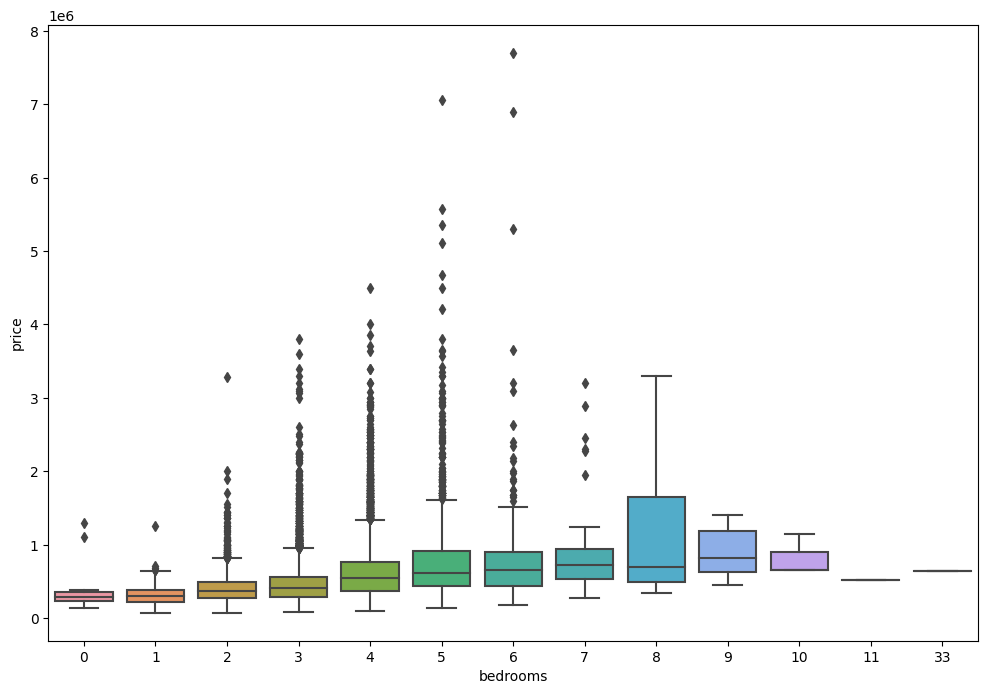

In [220]:
# VISUALIZE THE PRICE OF THE HOUSES BASED ON THE NUMBER OF BEDROOMS
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=house_price_df)

<AxesSubplot: xlabel='bathrooms', ylabel='price'>

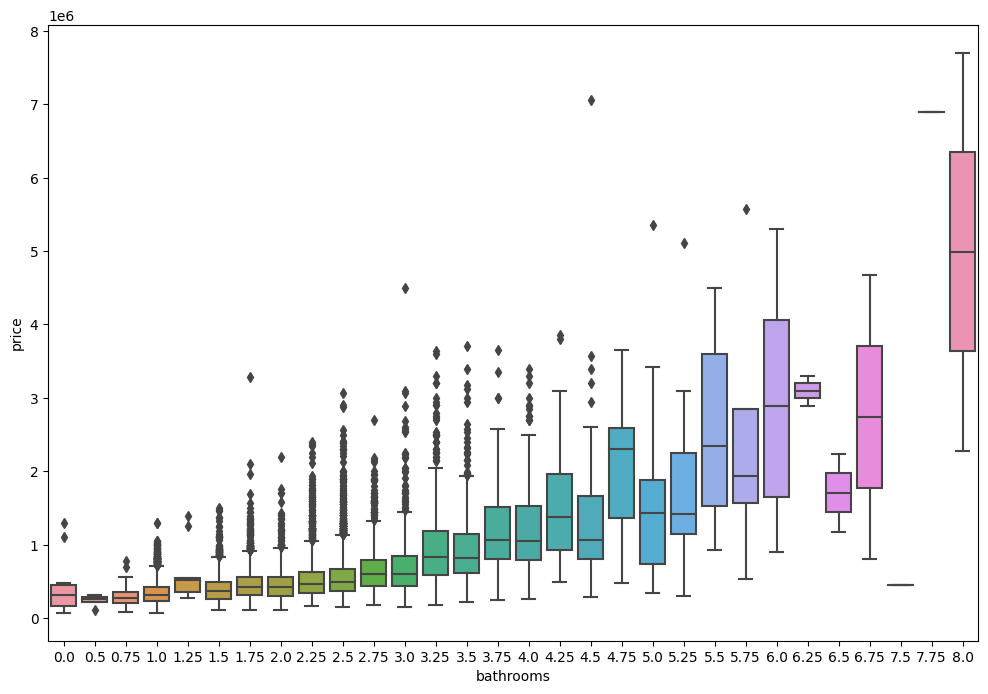

In [29]:
# VISUALIZE THE PRICE OF THE HOUSES BASED ON THE NUMBER OF BATHROOMS
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms',y='price',data=house_price_df)

The box plot shows that the median price for houses with 8 bathrooms is higher than the median price for houses with other values of the bathroom feature, it suggests that houses with 8 bathrooms have higher prices on average. Similarly, the box plot shows that the height of the box for houses with 0 - 3.0  bathrooms are the lowest among all values of the bathroom feature, it suggests that houses without much bathrooms are generally cheaper than houses with 8 bathrooms. 
Since EDA  is just a summary of the data and may not tell the whole story. Further analysis is needed to fully understand the relationship between the bathroom feature and house prices. Let's look at the correlation value between the features.


## Correlation Matrix

The correlation matrix can be used to understand the relationships between the different features in our dataset.

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. The coefficient ranges from -1 to 1, with 1 indicating a perfect positive correlation, 0 indicating no correlation, and -1 indicating a perfect negative correlation.

In [20]:
house_price_df.corr() 


price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308338   0.525134     0.702044  0.089655  0.256786   
bedrooms       0.308338  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525134  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702044  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089655  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256786  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266331 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397346  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036392  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667463  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605566  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323837  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.053982  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126442  0.018841   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053168 -0.152668  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.306919 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021571  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585374  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082456  0.029244   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266331  0.397346   0.036392  0.667463    0.605566   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323837  0.053982      0.126442 -0.053168  0.306919   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      

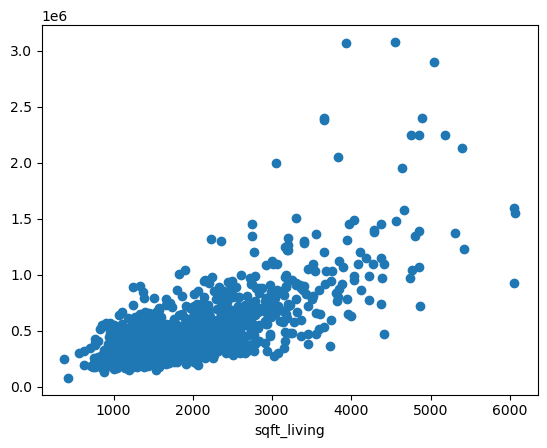

In [21]:
 # The most positive correlated features arranged in order: sqft_living,grade,sqft_above, sqft_living15,bathrooms, view, sqft_basement, bedrooms,lat,waterfront, floors, yr_renovated
n_samples = 1000
_ = plt.scatter(house_price_df['sqft_living'][:n_samples], house_price_df['price'][:n_samples])
_ = plt.xlabel('sqft_living')

Some observations from the correlation matrix are:
<ul>
<li>The price of the house is strongly positively correlated with the number of bedrooms, the square footage of living area, the square footage above the ground, the grade of the house, and the square footage of living area in 2015.</li>
<li>The price of the house is weakly positively correlated with the number of bathrooms, the square footage of the lot, and the square footage of the lot in 2015.</li>
<li>The price of the house is weakly negatively correlated with the age of the house and the condition of the house.</li>
<li>The number of bedrooms is strongly positively correlated with the square footage of living area, the square footage above the ground, and the grade of the house.</li>
<li>The number of bathrooms is strongly positively correlated with the number of bedrooms and the square footage of living area.</li>
<li>The square footage of living area is strongly positively correlated with the square footage above the ground and the grade of the house.</li>
<li>The square footage of the lot is weakly positively correlated with the square footage of the lot in 2015.</li>
<li>The square footage of living area in 2015 is strongly positively correlated with the square footage above the ground and the grade of the house.</li>
</ul>


# Data Preprocessing

Data preprocessing is the process of cleaning and transforming raw data to make it suitable for analysis or machine learning models. It involves a series of steps that include data cleaning, data transformation, and data integration. Since data preprocessing is an important step in data analysis and machine learning, as the quality of the input data can greatly affect the accuracy and effectiveness of the analysis or model. Below are the tasks to be perform

<ul> 
     <li>Handling missing data:There are no missing values in the dataset.</li>
     <li>Handling categorical variables: All the variables in the dataset are numerical</li>
     <li>Feature scaling: We Scale the numerical variables to ensure that they are on the same scale. We can use techniques like standardization or normalization.</li>
     <li> Feature selection: Since We don't necessarily need to use all the 18 features in our machine learning model. I am going to select which features to use based on their correlation with the target variable (price) and their relevance to the problem I am  trying to solve. But other techniques tha can be used in this case 
is the feature selection techniques such as correlation analysis, stepwise regression, or principal component analysis (PCA) to determine which features to include in our model.</li>
<li>Train-test split: Split the data into a training set and a test set to evaluate the performance of the model.</li>
</ul>


I am going to create a pipeline to handle all these pre-process steps, a pipeline is a series of data preprocessing and model training steps that are executed in a specific sequence to transform the raw input data to a model-ready format. A pipeline typically involves several steps, such as data cleaning, feature engineering, feature selection, and model training.

### Why use pipeline?

<ul>
 <li>it can simplify the code and make it more modular and reusable.</li>
 <li>it can help ensure that all the steps are executed in the correct order and that the data is processed consistently across multiple runs.</li>
 <li> it can help to prevent data leakage, which can occur when information from the test set is inadvertently used during the training phase, leading to overly optimistic performance estimates.</li>
</ul>


In [217]:

# Create a pipeline for numerical features
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Create a column transformer to drop certain columns
drop_columns = ['price']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline, [col for col in house_price_df.columns if col not in drop_columns])
    ])

In the code above,  we prepare the data for the machine learning model by creating a pipeline that includes several preprocessing steps to transform the input data into a form suitable for training the model.
<ul>
<li>First, a pipeline is created for the numerical features that includes two steps: an imputer that fills in any missing values with the median of the column and a standard scaler that scales the data to have a mean of 0 and a variance of 1.</li>
<li>
Then, a column transformer is created to drop certain columns from the data, such as the target column 'price', to avoid data leakage.</li>
</ul>




In [136]:
# Split the data into X and y
X = house_price_df.drop(columns=drop_columns, axis=1)    
y = house_price_df['price']

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

<ul>
<li>The first line of code defines the feature matrix X and target variable y. The drop function from pandas is used to drop the columns specified in drop_columns from house_price_df, creating a new dataframe that includes all other columns, which will be used as features for the model. The target variable is assigned to the 'price' column of house_price_df.</li>

<li>
The second line of code performs the train-test split using the train_test_split function from scikit-learn. The feature matrix X and target variable y are split into four sets: X_train (training features), X_test (testing features), y_train (training targets), and y_test (testing targets). The test_size parameter is set to 0.2, which means that 20% of the data is used for testing and 80% for training. The random_state parameter ensures that the same random split is obtained each time the code is run, and shuffle=True shuffles the data before the split to reduce any ordering bias in the dataset.
</li>

</ul>



# Experiment 1: Linear regression

Our first model to use is the Linear regression. Linear regression is a type of supervised machine learning algorithm used to model the relationship between a dependent variable (often denoted as "y") and one or more independent variables (often denoted as "x"). The goal of linear regression is to find the best fit line, or hyperplane for higher dimensions, that minimizes the sum of the squared distances between the predicted values and the actual values.

The mathematical notation for linear regression is often represented as:
$$y = b_{0} + b_{1}x_{1} + b_{2}x_{2} + ... + b_{n}*x_{n} + e$$

where $y$ represents the dependent variable, $b_{0}$ is the intercept, $b_{1}$ to bn are the coefficients for the independent variables $x_{1}$ to $xn$, and $e$ represents the error term. The coefficients are estimated using a method called Ordinary Least Squares (OLS) regression, which aims to minimize the sum of the squared errors between the predicted values and the actual values.

Linear regression assumes that there is a linear relationship between the dependent variable and the independent variables, and that the errors are normally distributed and have constant variance. It is often used in applications such as prediction, forecasting, and trend analysis, and can be extended to handle more complex problems such as multiple regression, polynomial regression, and logistic regression.

The code below combines the preprocessor and model into a single pipeline called lin_pipe. The preprocessor is created using ColumnTransformer to handle the numerical features in the dataset. It imputes missing values with median and scales the features using SimpleImputer and StandardScaler respectively. The model used is LinearRegression which is then combined with the preprocessor to form a single pipeline.

The lin_pipe is then fit to the training data using the fit() method. The model is then evaluated on the training data using the R2 score and RMSE. The R2 score indicates the proportion of variance in the dependent variable that is predictable from the independent variables. The RMSE measures the difference between the actual and predicted values. The same metrics are computed on the test data to evaluate the performance of the model on unseen data.

Overall, the code performs the following steps:
<ul>
 <li>Preprocessing of the data using the preprocessor pipeline</li>
 <li>Combining the preprocessor and model into a single pipeline called lin_pipe</li>
 <li>Fitting the lin_pipe to the training data</li>
 <li>Evaluating the performance of the model on the training and test data using R2 score and RMSE.</li>
</ul>

In [138]:

# Combine preprocessor and model into a single pipeline
lin_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline to the training data
lin_pipe.fit(X_train, y_train)

# Evaluation metrics on the training data
y_pred_train = lin_pipe.predict(X_train)
print('The R2 score of the Linear regression model on the training data is : ', r2_score(y_train, y_pred_train))
print('The RMSE score of the Linear regression model on the training data is: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))


# Evaluation metrics on the test data
y_pred_test = lin_pipe.predict(X_test)
print('The R2 score of the Linear regression model on the test data is : ', r2_score(y_test, y_pred_test))
print('The RMSE score of the Linear regression model on the test data is: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))


The R2 score of the Linear regression model on the training data is :  0.6991068905656663
The RMSE score of the Linear regression model on the training data is:  198400.5766916629
The R2 score of the Linear regression model on the test data is :  0.7011994125098133
The RMSE score of the Linear regression model on the test data is:  212661.40751139075


The reported scores indicate the performance of the Linear Regression model on the training and test data. The R2 score, also known as the coefficient of determination, is a measure of how well the model fits the data, with a value ranging from 0 to 1, where 1 indicates a perfect fit. An R2 score of 0.699 on the training data and 0.701 on the test data indicates that the model explains 69.9% and 70.1% of the variance in the target variable respectively, which is a decent fit.

The RMSE score, which stands for root mean squared error, is a measure of the difference between the predicted and actual values, with a lower value indicating better performance. The RMSE score of 198400.58 on the training data and 212661.41 on the test data indicates that the model's predictions on average deviate by about $198,400 and $212,661 from the actual target variable, respectively.

Overall, the model seems to be performing well with a decent R2 score and a reasonable RMSE score, but there is still room for improvement. Let's consider using Cross validation.

# Experiment 2: Cross validation on the linear regression

The code below performs cross-validation using the cross_validate() function from scikit-learn to estimate the performance of the pipeline model on the entire dataset X and y.
<ul>
<li>scoring is set to a list of two metrics: 'neg_mean_squared_error' and 'r2', which will be used to evaluate the model's performance.</li>
<li>cross_validate() is called with the pipeline lin_pipe, input features X, and target variable y, with cv=5 specifying 5-fold cross-validation.</li>
<li>The return_train_score parameter is set to True to calculate both training and validation scores.
The function returns a dictionary of results for each scoring metric, for both the training and validation sets, across all folds of the cross-validation.
</li>
<li>
Finally, the results are transformed into a pandas DataFrame for easier analysis and interpretation.</li>
</ul>



In [211]:
# cross validation using the pipeline
scoring = ['neg_mean_squared_error' , 'r2']
cv_results_lin = cross_validate(lin_pipe, X, y, cv=5, scoring=scoring, return_train_score=True)

cv_results_lin = pd.DataFrame(cv_results_lin)
cv_results_lin


fit_time  score_time  test_neg_mean_squared_error  \
0  0.075743    0.007643                -4.605808e+10   
1  0.068132    0.007251                -4.338001e+10   
2  0.067463    0.008759                -3.595802e+10   
3  0.065911    0.007718                -3.715816e+10   
4  0.066413    0.007639                -4.327518e+10   

   train_neg_mean_squared_error   test_r2  train_r2  
0                 -3.920456e+10  0.696253  0.700217  
1                 -3.983443e+10  0.691050  0.701738  
2                 -4.168687e+10  0.692663  0.700889  
3                 -4.143782e+10  0.707673  0.697328  
4                 -4.009855e+10  0.685335  0.700913

In [212]:
test_mse_lin = cv_results_lin['test_neg_mean_squared_error'].mean()
test_rmse_lin = np.sqrt(-test_mse_lin)
test_r2_lin = cv_results_lin['test_r2'].mean()
print(f"The mean square error of the Linear regression model on the test data after 10 CV is : {test_mse_lin:.3f}")
print(f"The root mean square error of the Linear regression model on the test data after 10 CV is : {test_rmse_lin:.3f}")
print(f"The r2 score of the Linear regression model on the test data after 10 CV is: {test_r2_lin:.3f}")

train_mse_lin = cv_results_lin['train_neg_mean_squared_error'].mean()
train_rmse_lin = np.sqrt(-train_mse_lin)
train_r2_lin = cv_results_lin['train_r2'].mean()
print(f"The mean square error of the Linear regression model on the train data after 10 CV is : {train_mse_lin:.3f}")
print(f"The root mean square error of the Linear regression model on the train data after 10 CV is : {train_rmse_lin:.3f}")
print(f"The r2 score of the Linear regression model on the train data after 10 CV is : {train_r2_lin:.3f}")


The mean square error of the Linear regression model on the test data after 10 CV is : -41165890191.297
The root mean square error of the Linear regression model on the test data after 10 CV is : 202893.790
The r2 score of the Linear regression model on the test data after 10 CV is: 0.695
The mean square error of the Linear regression model on the train data after 10 CV is : -40452447035.171
The root mean square error of the Linear regression model on the train data after 10 CV is : 201127.937
The r2 score of the Linear regression model on the train data after 10 CV is : 0.700


In [213]:
errors_linear_df = pd.DataFrame({
    'Model': 'Linear Regression',
    'Test MSE': test_mse_lin,
    'Test RMSE': test_rmse_lin,
    'Test R2': test_r2_lin,
    'Train MSE': train_mse_lin,
    'Train RMSE': train_rmse_lin,
    'Train R2': train_r2_lin
}, index=[0])
errors_linear_df

Model      Test MSE      Test RMSE   Test R2     Train MSE  \
0  Linear Regression -4.116589e+10  202893.790421  0.694595 -4.045245e+10   

      Train RMSE  Train R2  
0  201127.936983  0.700217

<AxesSubplot: >

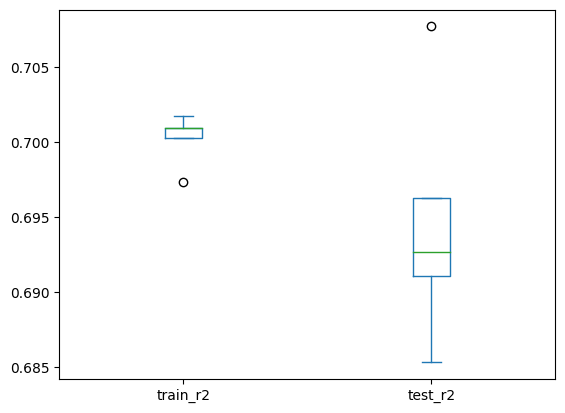

In [214]:
result = cv_results_lin[['train_r2', 'test_r2']]
result.plot(kind='box')

 The R2 score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable. It provides an indication of the goodness of fit of the model.

The results suggest that the model has moderate predictive power, with R2 scores of 0.695 on the test data and 0.700 on the train data. The RMSE values indicate that, on average, the predicted prices are off by approximately $202,893 on the test data and $201,127 on the train data. 

In [158]:
errors_linear_reg = pd.Series(cv_results_lin['test_r2']*100, name='errors_linear_reg')


# Experiment 3: Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial. The equation for a polynomial regression model of degree n can be written in the following form:

$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_n x^n + \epsilon $$

where:

$y$ is the dependent variable, $x$ is the independent variable, $\beta_i$ are the coefficients of the model, $\epsilon$ is the error term.

The degree of the polynomial regression model $(n)$ indicates the number of features or predictors in the model. The higher the degree of the polynomial, the more flexible the model is, which may result in overfitting to the training data.

The main difference between linear regression and polynomial regression is the relationship between the independent and dependent variables. Linear regression assumes a linear relationship, while polynomial regression models a non-linear relationship.


The code below defines a pipeline named poly_lin_reg that preprocesses the data using a preprocessor and then applies a polynomial transformation of degree 2 using PolynomialFeatures. Finally, it fits a linear regression model to the transformed data using LinearRegression.

Here is a breakdown of the steps:
<ul>
<li>preprocessor: This is a pre-processing step defined earlier, which handles missing values and scales the numerical data.</li>
<li>poly: This step applies a polynomial transformation of degree 2 to the preprocessed data, creating polynomial features. For example, if the input feature is x, then this step will create new features such as x^2, x^3, x^4, etc.</li>
<li>model: This step fits a linear regression model to the transformed data, using the ordinary least squares method to estimate the coefficients.</li>
</ul>
Overall, this pipeline performs a polynomial regression on the input data, using a second-degree polynomial to model the relationship between the input features and the target variable.

In [149]:
# polynomial regression with degree 4 on the pipeline
poly_lin_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])
poly_lin_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15'])])),
                ('poly', PolynomialFeatures()), ('model', LinearRegression())])

In [169]:
# Fit the pipeline to the training data
cv_results_poly = cross_validate(poly_lin_reg, X, y,
                            cv=10, scoring=scoring,
                            return_train_score=True,
                            return_estimator=True)


cv_results_poly = pd.DataFrame(cv_results_poly)
cv_results_poly

fit_time  score_time                                          estimator  \
0  0.385092    0.013145  (ColumnTransformer(transformers=[('num',\n    ...   
1  0.581265    0.018971  (ColumnTransformer(transformers=[('num',\n    ...   
2  0.486684    0.014161  (ColumnTransformer(transformers=[('num',\n    ...   
3  0.452812    0.011087  (ColumnTransformer(transformers=[('num',\n    ...   
4  0.346721    0.014344  (ColumnTransformer(transformers=[('num',\n    ...   
5  0.341787    0.012877  (ColumnTransformer(transformers=[('num',\n    ...   
6  0.426630    0.010943  (ColumnTransformer(transformers=[('num',\n    ...   
7  0.364968    0.032860  (ColumnTransformer(transformers=[('num',\n    ...   
8  0.369566    0.011464  (ColumnTransformer(transformers=[('num',\n    ...   
9  0.365641    0.013189  (ColumnTransformer(transformers=[('num',\n    ...   

   test_neg_mean_squared_error  train_neg_mean_squared_error   test_r2  \
0                -2.460752e+10                 -2.301238e+10  0.830069   
1                -2.648148e+10                 -2.280941e+10  0.832742   
2                -2.313143e+10                 -2.308322e+10  0.801021   
3                -2.551008e+10                 -2.288129e+10  0.845084   
4                -1.960783e+10                 -2.344216e+10  0.821841   
5                -2.324116e+10                 -2.307559e+10  0.812319   
6                -2.549520e+10                 -2.284595e+10  0.792245   
7                -2.395869e+10                 -2.299886e+10  0.817812   
8                -2.511769e+10                 -2.285983e+10  0.813948   
9                -3.061016e+10                 -2.228712e+10  0.779571   

   train_r2  
0  0.828069  
1  0.827656  
2  0.831535  
3  0.826171  
4  0.829714  
5  0.830542  
6  0.832394  
7  0.830054  
8  0.830595  
9  0.833905

In [164]:

test_mse_poly = cv_results_poly['test_neg_mean_squared_error'].mean()
test_rmse_poly = np.sqrt(-test_mse_poly)
test_r2_poly = cv_results_poly['test_r2'].mean()
print(f"The mean square error of the Polynomial regression model on the test data after 10 CV is : {test_mse_poly:.3f}")
print(f"The root mean square error of the Polynomial regression model on the test data after 10 CV is : {test_rmse_poly:.3f}")
print(f"The r2 score of the Polynomial regression model on the test data after 10 CV is: {test_r2_poly:.3f}")

train_mse_poly = cv_results_poly['train_neg_mean_squared_error'].mean()
train_rmse_poly = np.sqrt(-train_mse_poly)
train_r2_poly = cv_results_poly['train_r2'].mean()
print(f"The mean square error of the Polynomial regression model on the train data after 10 CV is : {train_mse_poly:.3f}")
print(f"The root mean square error of the Polynomial regression model on the train data after 10 CV is : {train_rmse_poly:.3f}")
print(f"The r2 score of the Polynomial regression model on the train data after 10 CV is : {train_r2_poly:.3f}")

The mean square error of the Polynomial regression model on the test data after 10 CV is : -24776124340.114
The root mean square error of the Polynomial regression model on the test data after 10 CV is : 157404.334
The r2 score of the Polynomial regression model on the test data after 10 CV is: 0.815
The mean square error of the Polynomial regression model on the train data after 10 CV is : -22929579756.312
The root mean square error of the Polynomial regression model on the train data after 10 CV is : 151425.162
The r2 score of the Polynomial regression model on the train data after 10 CV is : 0.830


In [179]:
errors_poly_reg = pd.Series(cv_results_poly['test_r2']*100, name='errors_poly_reg')

all_errors = pd.concat(
    [errors_linear_reg, errors_poly_reg],
    axis=1,
)
all_errors.describe()

errors_linear_reg  errors_poly_reg
count           5.000000        10.000000
mean           69.459475        81.466527
std             0.830422         1.965610
min            68.533459        77.957065
25%            69.105003        80.384516
50%            69.266333        81.588012
75%            69.625262        82.801203
max            70.767320        84.508437

In [165]:
errors_poly_df = pd.DataFrame({
    'Model': 'Polynomial Regression',
    'Test MSE': test_mse_poly,
    'Test RMSE': test_rmse_poly,
    'Test R2': test_r2_poly,
    'Train MSE': train_mse_poly,
    'Train RMSE': train_rmse_poly,
    'Train R2': train_r2_poly
}, index=[0])
errors_poly_df

Model      Test MSE      Test RMSE   Test R2     Train MSE  \
0  Polynomial Regression -2.477612e+10  157404.333931  0.814665 -2.292958e+10   

     Train RMSE  Train R2  
0  151425.16223  0.830063

<AxesSubplot: title={'center': 'Polynomial Regression'}>

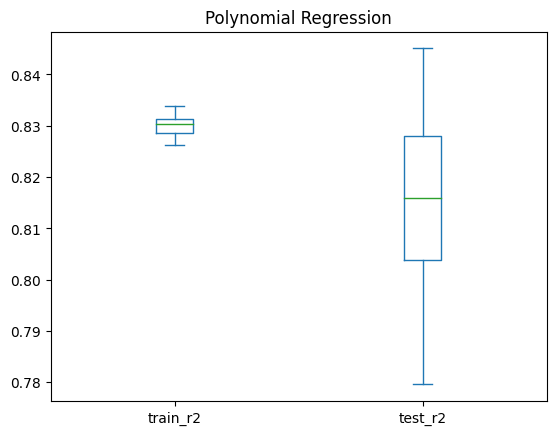

In [168]:

result = cv_results_poly[['train_r2', 'test_r2']]
result.plot(kind='box', title='Polynomial Regression')

The results of the polynomial regression model indicate that it has better performance than the linear regression model. The model has a higher R2 score on both the test and training data, indicating that the model is better able to capture the variation in the data. The mean square error is also lower for both the test and training data, which is a good indicator of the model's accuracy. The root mean square error is also lower, indicating that the predictions are closer to the actual values. Overall, these results suggest that the polynomial regression model is a better fit for the data than the linear regression model.

# Experiment 4 : Gradient Boosting

Gradient Boosting is an ensemble learning technique used for regression and classification tasks. It is a sequential process that combines multiple weak learners to create a strong model. The idea behind gradient boosting is to train a sequence of models with the aim of improving the errors of the previous model. It works by adding new models to the ensemble in a way that minimizes the residual errors of the previous model. The final prediction is then calculated by taking the weighted average of the predictions of all models in the ensemble.

The Gradient Boosting algorithm involves three main components: a loss function, weak learners, and a boosting algorithm. The loss function measures the difference between the predicted and actual values and the goal is to minimize this difference. The weak learners are typically decision trees with a small number of levels, also known as stumps. The boosting algorithm updates the weights of the instances that are misclassified by the previous model and trains a new model to classify them correctly.

One of the benefits of Gradient Boosting is that it can handle different types of data, such as numerical and categorical data, and can automatically handle missing values. It is also able to handle complex nonlinear relationships and high-dimensional data. However, the main drawback of Gradient Boosting is that it can be prone to overfitting if the number of trees in the ensemble is too high, so it is important to tune the hyperparameters carefully.

The code below  performs Gradient Boosting regression using a pipeline with cross-validation:
<ul>
<li>First, a pipeline is defined using the Pipeline class from scikit-learn. The pipeline consists of a preprocessor step and a GradientBoostingRegressor model. The preprocessor is used to transform the input features before they are fed into the model.
</li>
<li>Then, the cross_validate function from scikit-learn is used to perform cross-validation. The function takes the pipeline, input data X, and target y as inputs, along with the number of folds for cross-validation (cv), the evaluation metric (scoring), and flags to return the training scores and models (return_train_score and return_estimator).
</li>
<li>After running the cross_validate function, the results are stored in a pandas DataFrame cv_results_gbr. This DataFrame contains the training and test scores for each fold, as well as information about the fitted estimators for each fold.</li>
</ul>




In [181]:
# Gradient Boosting Regressor on the pipeline
gbr_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor())
])
# Fit the pipeline to the training data
cv_results_gbr = cross_validate(gbr_pipe, X, y,

                            cv=10, scoring=scoring,
                            return_train_score=True,
                            return_estimator=True)

cv_results_gbr = pd.DataFrame(cv_results_gbr)
cv_results_gbr

fit_time  score_time                                          estimator  \
0  6.085569    0.011944  (ColumnTransformer(transformers=[('num',\n    ...   
1  6.433362    0.012718  (ColumnTransformer(transformers=[('num',\n    ...   
2  5.551149    0.011239  (ColumnTransformer(transformers=[('num',\n    ...   
3  5.084967    0.009358  (ColumnTransformer(transformers=[('num',\n    ...   
4  5.091790    0.012327  (ColumnTransformer(transformers=[('num',\n    ...   
5  5.293116    0.009620  (ColumnTransformer(transformers=[('num',\n    ...   
6  5.405614    0.008876  (ColumnTransformer(transformers=[('num',\n    ...   
7  5.295691    0.008794  (ColumnTransformer(transformers=[('num',\n    ...   
8  5.020218    0.008102  (ColumnTransformer(transformers=[('num',\n    ...   
9  5.028222    0.009470  (ColumnTransformer(transformers=[('num',\n    ...   

   test_neg_mean_squared_error  train_neg_mean_squared_error   test_r2  \
0                -1.741426e+10                 -1.371390e+10  0.879743   
1                -1.816952e+10                 -1.356115e+10  0.885241   
2                -1.488670e+10                 -1.368409e+10  0.871943   
3                -2.116614e+10                 -1.355500e+10  0.871464   
4                -1.486491e+10                 -1.363764e+10  0.864936   
5                -1.993926e+10                 -1.337963e+10  0.838983   
6                -1.990837e+10                 -1.323547e+10  0.837771   
7                -1.696035e+10                 -1.342096e+10  0.871029   
8                -1.742677e+10                 -1.341000e+10  0.870916   
9                -1.947544e+10                 -1.325310e+10  0.859754   

   train_r2  
0  0.897540  
1  0.897534  
2  0.900131  
3  0.897023  
4  0.900935  
5  0.901745  
6  0.902900  
7  0.900828  
8  0.900624  
9  0.901231

In [182]:


test_mse_gbr = cv_results_gbr['test_neg_mean_squared_error'].mean()
test_rmse_gbr = np.sqrt(-test_mse_gbr)
test_r2_gbr = cv_results_gbr['test_r2'].mean()
print(f"The mean square error of the Gradient Boosting Regressor model on the test data after 10 CV is : {test_mse_gbr:.3f}")
print(f"The root mean square error of the Gradient Boosting Regressor model on the test data after 10 CV is : {test_rmse_gbr:.3f}")

print(f"The r2 score of the Gradient Boosting Regressor model on the test data after 10 CV is: {test_r2_gbr:.3f}")

train_mse_gbr = cv_results_gbr['train_neg_mean_squared_error'].mean()
train_rmse_gbr = np.sqrt(-train_mse_gbr)
train_r2_gbr = cv_results_gbr['train_r2'].mean()
print(f"The mean square error of the Gradient Boosting Regressor model on the train data after 10 CV is : {train_mse_gbr:.3f}")
print(f"The root mean square error of the Gradient Boosting Regressor model on the train data after 10 CV is : {train_rmse_gbr:.3f}")
print(f"The r2 score of the Gradient Boosting Regressor model on the train data after 10 CV is : {train_r2_gbr:.3f}")



The mean square error of the Gradient Boosting Regressor model on the test data after 10 CV is : -18021170347.305
The root mean square error of the Gradient Boosting Regressor model on the test data after 10 CV is : 134242.953
The r2 score of the Gradient Boosting Regressor model on the test data after 10 CV is: 0.865
The mean square error of the Gradient Boosting Regressor model on the train data after 10 CV is : -13485094483.544
The root mean square error of the Gradient Boosting Regressor model on the train data after 10 CV is : 116125.340
The r2 score of the Gradient Boosting Regressor model on the train data after 10 CV is : 0.900


The results suggest that the Gradient Boosting Regressor model performs well on the test data as well as the training data. The root mean square error of the model on the test data after 10 cross-validation is 134242.953, which is relatively low compared to the range of target values. Additionally, the r2 score of the model on the test data after 10 cross-validation is 0.865, which indicates that the model is able to explain 86.5% of the variance in the target variable.

Furthermore, the mean square error of the model on the training data after 10 cross-validation is relatively low at -13485094483.544, and the r2 score is high at 0.900, indicating good performance on the training data as well. These results suggest that the Gradient Boosting Regressor model may be a good choice for predicting housing prices, and it has the potential to generalize well to new data.

In [190]:

errors_gbr_df = pd.DataFrame({
    'Model': 'Gradient Boosting Regressor',
    'Test MSE': test_mse_gbr,
    'Test RMSE': test_rmse_gbr,
    'Test R2': test_r2_gbr,
    'Train MSE': train_mse_gbr,
    'Train RMSE': train_rmse_gbr,
    'Train R2': train_r2_gbr
}, index=[0])
errors_gbr_df


# 

Model      Test MSE      Test RMSE   Test R2  \
0  Gradient Boosting Regressor -1.802117e+10  134242.952691  0.865178   

      Train MSE     Train RMSE  Train R2  
0 -1.348509e+10  116125.339541  0.900049

fit_time  score_time                                          estimator  \
0  6.085569    0.011944  (ColumnTransformer(transformers=[('num',\n    ...   
1  6.433362    0.012718  (ColumnTransformer(transformers=[('num',\n    ...   
2  5.551149    0.011239  (ColumnTransformer(transformers=[('num',\n    ...   
3  5.084967    0.009358  (ColumnTransformer(transformers=[('num',\n    ...   
4  5.091790    0.012327  (ColumnTransformer(transformers=[('num',\n    ...   
5  5.293116    0.009620  (ColumnTransformer(transformers=[('num',\n    ...   
6  5.405614    0.008876  (ColumnTransformer(transformers=[('num',\n    ...   
7  5.295691    0.008794  (ColumnTransformer(transformers=[('num',\n    ...   
8  5.020218    0.008102  (ColumnTransformer(transformers=[('num',\n    ...   
9  5.028222    0.009470  (ColumnTransformer(transformers=[('num',\n    ...   

   test_neg_mean_squared_error  train_neg_mean_squared_error   test_r2  \
0                -1.741426e+10                 -1.371390e+10  0.879743   
1                -1.816952e+10                 -1.356115e+10  0.885241   
2                -1.488670e+10                 -1.368409e+10  0.871943   
3                -2.116614e+10                 -1.355500e+10  0.871464   
4                -1.486491e+10                 -1.363764e+10  0.864936   
5                -1.993926e+10                 -1.337963e+10  0.838983   
6                -1.990837e+10                 -1.323547e+10  0.837771   
7                -1.696035e+10                 -1.342096e+10  0.871029   
8                -1.742677e+10                 -1.341000e+10  0.870916   
9                -1.947544e+10                 -1.325310e+10  0.859754   

   train_r2  
0  0.897540  
1  0.897534  
2  0.900131  
3  0.897023  
4  0.900935  
5  0.901745  
6  0.902900  
7  0.900828  
8  0.900624  
9  0.901231

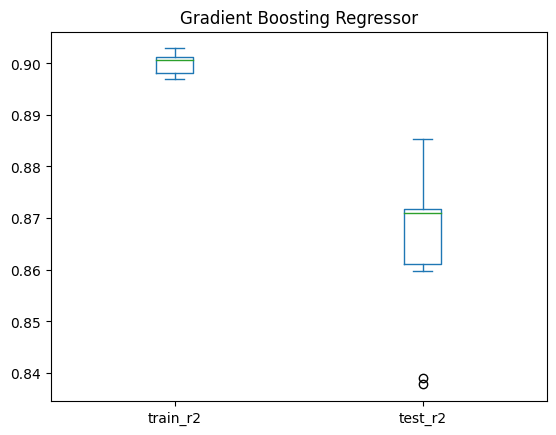

In [194]:
cv_results_gbr[['train_r2', 'test_r2']].plot(kind='box', title='Gradient Boosting Regressor')
cv_results_gbr

# Comparison Between the three models

One commonly used plot to compare the performance of two models is a scatter plot of the predicted values from each model against the true values. This plot allows us to visually compare the accuracy and variability of each model's predictions.

To create this plot in Python using scikit-learn, we use the matplotlib library and the predict() method of each model to generate the predicted values.

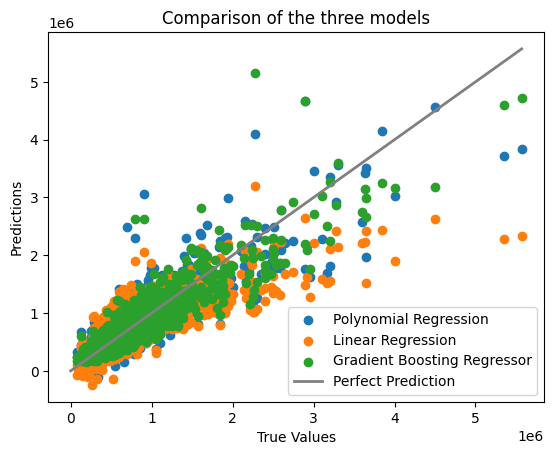

In [195]:

# fit the linear model
lin_pipe.fit(X_train, y_train)
# fit the polynomial model
poly_lin_reg.fit(X_train, y_train)
# fit the Gradient Boosting Regressor model
gbr_pipe.fit(X_train, y_train)

# Compare the performance the three model using scatter plot
plt.scatter(y_test, poly_lin_reg.predict(X_test), label='Polynomial Regression')
plt.scatter(y_test, lin_pipe.predict(X_test), label='Linear Regression')
plt.scatter(y_test, gbr_pipe.predict(X_test), label='Gradient Boosting Regressor')

#  Add a diagonal line representing the perfect prediction
plt.plot([0,max(y_test)], [0,max(y_test)], c='gray', label='Perfect Prediction', linewidth=2)



plt.title('Comparison of the three models')
plt.xlabel('True Values')

plt.ylabel('Predictions')
plt.legend()
plt.show()

In this plot, the closer the points are to the diagonal line, the better the model's predictions are. We can see that most of the green data points are closer to the diagonal line, suggesting that the Gradient Boosting Regressor is better than other models consider.


We  can also use additional metrics, such as  R-squared to further compare our models

### Residual plot

A residual plot is a graphical tool used to evaluate the fit of a regression model. It plots the differences between predicted values and actual values against the actual values. A good fit should produce a scatterplot without any obvious patterns. Here, we compare the residual plots of the three models  we used for predicting house prices: Linear Regression, Polynomial Regression, and Gradient Boosting Regressor.

The R2 score of the Linear regression model is :  0.7011994125098133
The R2 score of the Polynomial regression model is :  0.7986814872145604
The R2 score of the Gradient Boosting Regressor model is :  0.8591487773879856


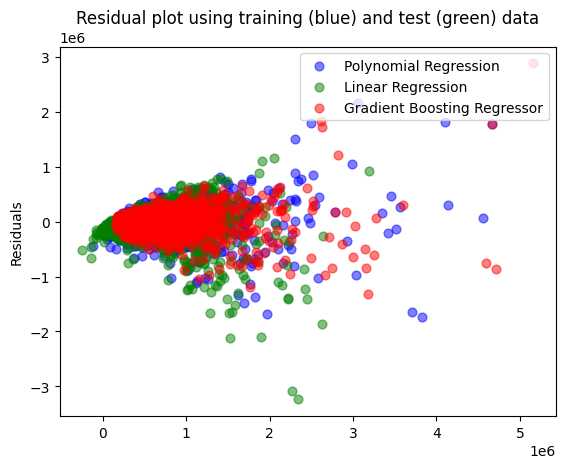

In [196]:
#  R2 score of the three models
print('The R2 score of the Linear regression model is : ', r2_score(y_test, lin_pipe.predict(X_test)))
print('The R2 score of the Polynomial regression model is : ', r2_score(y_test, poly_lin_reg.predict(X_test)))
print('The R2 score of the Gradient Boosting Regressor model is : ', r2_score(y_test, gbr_pipe.predict(X_test)))


#  Plot the residuals of the three models
plt.scatter(poly_lin_reg.predict(X_test), poly_lin_reg.predict(X_test) - y_test, c='b', s=40, alpha=0.5, label='Polynomial Regression')
plt.scatter(lin_pipe.predict(X_test), lin_pipe.predict(X_test) - y_test, c='g', s=40, alpha=0.5, label='Linear Regression')
plt.scatter(gbr_pipe.predict(X_test), gbr_pipe.predict(X_test) - y_test, c='r', s=40, alpha=0.5, label='Gradient Boosting Regressor')
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.show()

The residual plot for the Linear Regression model shows a clear pattern of residuals increasing with predicted values, indicating that the model may not be capturing the full complexity of the data. The polynomial regression model, on the other hand, shows a much better fit, with fewer outliers and no apparent pattern. This is reflected in the higher R-squared value and lower RMSE scores observed for the polynomial model. Finally, the Gradient Boosting Regressor model has the best residual plot, with very few outliers and a mostly random scatter of residuals. This is also reflected in the lowest RMSE score and highest R-squared value.

Overall, the residual plots indicate that the Gradient Boosting Regressor model performs best, with the lowest overall error and the most consistent fit. However, both the Linear Regression and Polynomial Regression models show that there is still room for improvement in the model fit, with the Linear Regression model showing a clear need for a more complex model and the Polynomial Regression model showing a slight tendency toward overfitting.

# Save the model

In [203]:
# Save the model 
import pickle

# Save the best model(gradient boosting) as a pickle in a file
pickle.dump(gbr_pipe, open('model.pkl','wb'))

In [204]:

# Load the model from the file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [205]:
# Use the loaded model to make predictions
pred= model.predict(X_test)
r2_score(y_test, pred)

0.8591487773879856